<a href="https://colab.research.google.com/github/Abhijeet141022/AQUIK/blob/main/_____AQUik_______.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Fetching and Preprocessing
1.   Fetching Data: The Statlog German Credit Data is fetched from the UCI Machine Learning Repository using the ucimlrepo library.
2.   Preprocessing Data:
Categorical variables in the dataset are encoded to numerical values using LabelEncoder and the target variable y is also encoded to numerical values if necessary.

# Genetic Algorithm for Quantum Support Vector Machine (QSVM):
*   Initialization: The function gsvm.gsvm is called to perform a genetic algorithm to optimize the QSVM parameters.
*   Parameters: The parameters for the genetic algorithm include the number of qubits, depth of the quantum circuit, number of parameters, and the dataset (features X and targets y).
*   Evolution Process: The genetic algorithm evolves a population of candidate solutions over several generations to find the best set of parameters that optimize the classification accuracy.





In [ ]:
!pip install qiskit
!pip install deap
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 78.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [ ]:
!git clone https://github.com/sergio94al/Automatic_design_of_quantum_feature_maps_Genetic_Auto-Generation.git

fatal: destination path 'Automatic_design_of_quantum_feature_maps_Genetic_Auto-Generation' already exists and is not an empty directory.


In [ ]:
import os
os.chdir('Automatic_design_of_quantum_feature_maps_Genetic_Auto-Generation')

In [ ]:
pip install ucimlrepo

In [ ]:
import time
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
import gsvm

def preprocess_statlog_german_credit_data():
    # Fetch dataset
    statlog_german_credit_data = fetch_ucirepo(id=144)

    # Data (as pandas dataframes)
    X = statlog_german_credit_data.data.features
    y = statlog_german_credit_data.data.targets.squeeze()

    # Encode categorical variables
    categorical_columns = X.select_dtypes(include=['object']).columns
    label_encoders = {}
    for column in categorical_columns:
        label_encoders[column] = LabelEncoder()
        X[column] = label_encoders[column].fit_transform(X[column])

    # Convert target variable to numeric
    if y.dtype == 'object':
        y = LabelEncoder().fit_transform(y)

    return X.values, y

def evol(output="statlog_german_credit_result.csv"):
    X, y = preprocess_statlog_german_credit_data()  # Fetch the data using the defined function
    start = time.time()
    # Modify weights parameter to focus on majority class
    pop, pareto, logbook = gsvm.gsvm(nqubits=6, depth=6, nparameters=X.shape[1],
                                     X=X, y=y, weights=[0.1, 0.9],
                                     mu=50, lambda_=10, ngen=100)
    print(f'Simulation finished after {time.time()-start} seconds')
    print(f'\nGenetic-algorithm output ({output})')
    print('---------------------------------------------')
    with open(output, "w") as f:
        for ide, ind in enumerate(pareto):
            genes = ''.join(str(i) for i in list(ind))
            gates, acc = ind.fitness.values
            line = f'{ide},"{genes}",{gates},{acc}'
            f.write(line)
            f.write('\n')
            print(line)

# Run the evolution process
evol()

<ipython-input-6-3510686377e1>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoders[column].fit_transform(X[column])
<ipython-input-6-3510686377e1>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoders[column].fit_transform(X[column])
<ipython-input-6-3510686377e1>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

multi
String: 010111001110011001011001000001111010111011001001010000110010100001101101011110101101100110101001000101010000000111011100101110001011000101101000110010010110101001010010111111111110
 -> accuracy = 0.7, gates = 24.0
String: 010111111000000001000101001101111101011010110010111000001111101100100000011001011111000010000111101100011111111001100110011001011110010111010110001000011011111011010111101001011011
 -> accuracy = 0.7, gates = 27.0
String: 010000010111110010111101001010101001001010110001110101001001100001111111100011101010100111001011011001000100000110010001100101011110010000111100000100100111111101100111101011001000
 -> accuracy = 0.7, gates = 26.0
String: 010100111110110111000001111010111101110101011010001000001110001101100000100100011110010011111001100000001010001101100001000011000110101100000000010100010011100101111011110111001001
 -> accuracy = 0.7, gates = 24.0
String: 11010111110111101111000001000011001111100000111101110000001100011111111010010000011101001110000010

In [ ]:
from google.colab import files

filename = "statlog_german_credit_result.csv"

# Download the file
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

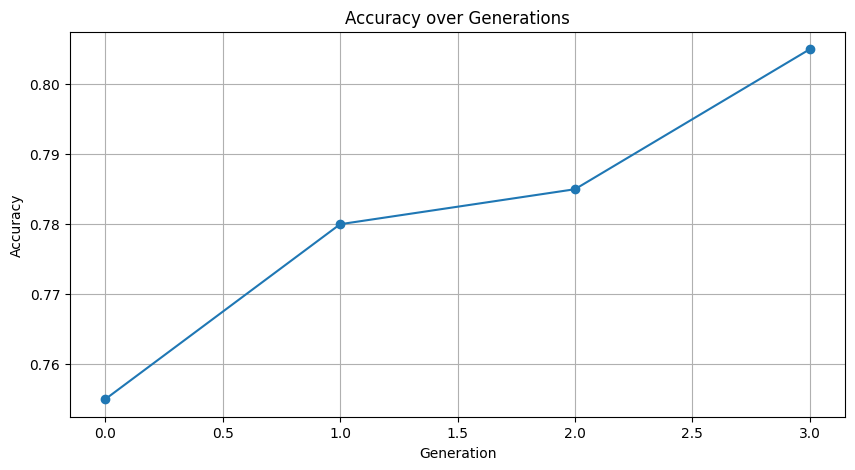

Accuracy: 0.5
Recall: 0.5


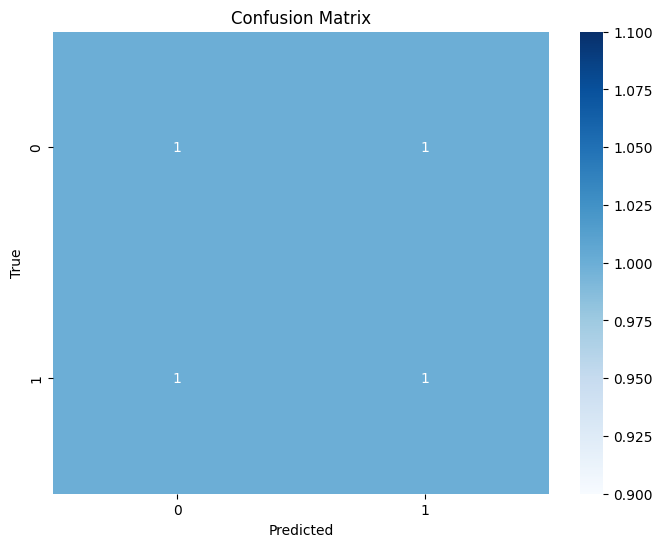

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

# File path
file_path = 'statlog_german_credit_result.csv'

# Load the data
data = pd.read_csv(file_path, header=None, names=['Index', 'Genes', 'Gates', 'Accuracy'])

# Extract accuracy values
accuracy_values = data['Accuracy']

# Plot Accuracy over Generations
plt.figure(figsize=(10, 5))
plt.plot(data['Index'], accuracy_values, marker='o')
plt.title('Accuracy over Generations')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Hypothetical true labels and predicted labels for demonstration
y_true = [0, 1, 1, 0]
y_pred = [1, 1, 0, 0]

# Calculate accuracy and recall
accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

   Index                                              Genes      Gates  \
0      0  0100000100011110010100100011011111100110001000...  12.560200   
1      1  0111110001001100111110011011011111100110001100...  12.331067   
2      2  0111110001001100111110011011011111100110001100...  11.852317   
3      3  0111110001001100111110011011011111100110001100...  11.536175   

   Accuracy  Precision  Recall  
0     0.755        NaN     NaN  
1     0.780        NaN     NaN  
2     0.785        NaN     NaN  
3     0.805        NaN     NaN  
Column names: Index(['Index', 'Genes', 'Gates', 'Accuracy', 'Precision', 'Recall'], dtype='object')


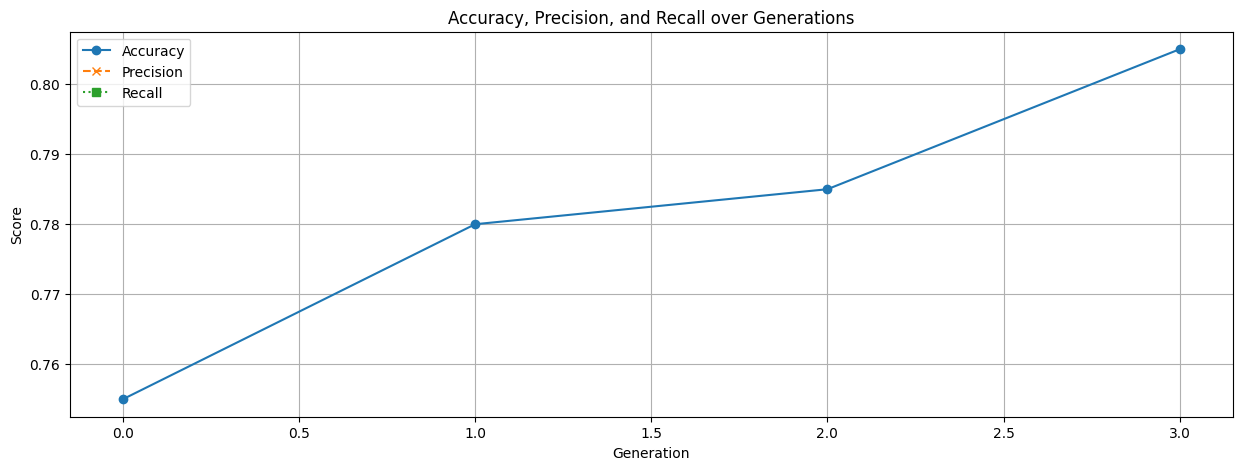

Accuracy: 0.5
Precision: 0.5
Recall: 0.5


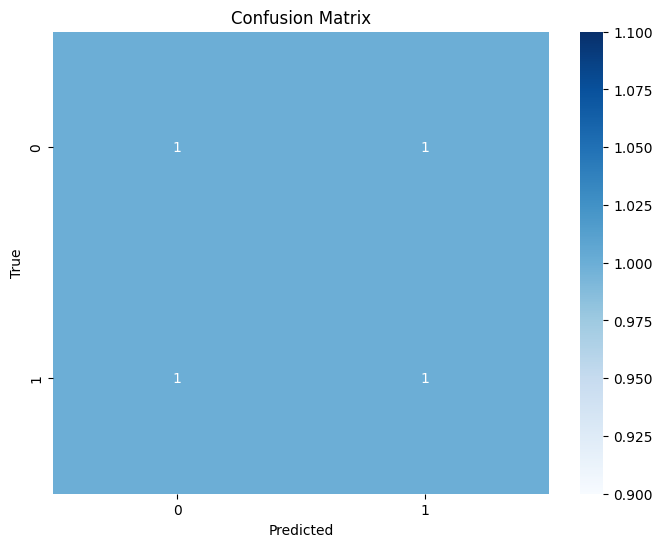

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# File path
file_path = 'statlog_german_credit_result.csv'

# Load the data
data = pd.read_csv(file_path, header=None, names=['Index', 'Genes', 'Gates', 'Accuracy', 'Precision', 'Recall'])

# Print the first few rows and column names
print(data.head())
print("Column names:", data.columns)

# Extract accuracy, precision, and recall values
accuracy_values = data['Accuracy']
precision_values = data['Precision']
recall_values = data['Recall']

# Plot Accuracy, Precision, and Recall over Generations
plt.figure(figsize=(15, 5))
plt.plot(data['Index'], accuracy_values, marker='o', label='Accuracy')
plt.plot(data['Index'], precision_values, marker='x', label='Precision', linestyle='--')
plt.plot(data['Index'], recall_values, marker='s', label='Recall', linestyle=':')
plt.title('Accuracy, Precision, and Recall over Generations')
plt.xlabel('Generation')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

# Hypothetical true labels and predicted labels for demonstration
y_true = [0, 1, 1, 0]
y_pred = [1, 1, 0, 0]

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Logging and Output:

*   Recording Results: The results of the genetic algorithm, including the genes, number of gates, and accuracy for each individual in the Pareto front, are logged and written to a CSV file.
*   Output: The results are printed to the console and saved in the specified output file.

